In [1]:
import eagleSqlTools as est
import numpy as np
import matplotlib.colors
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp
from mpl_toolkits import mplot3d
import random

In [2]:
conn = est.connect("lzm898", "YB854nic", "http://virgodb.dur.ac.uk:8080/MyMillennium")

In [3]:
##Let us do another constraint, mstars_bulge+mstars_disk>=10^7

In [4]:
query3="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e7 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [5]:
#check
query="SELECT gal.x, gal.y, gal.z, halo.m200_crit, dist FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e11 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0 and galaxyid=5098129"

In [6]:
res3=est.execute_query(conn, query3)

In [7]:
print(res3)

[(116.7189  ,   55.832306,   83.487976, 1.03526992e+08)
 ( 84.53647 ,  117.04135 ,  118.45148 , 1.03526992e+08)
 ( 71.98544 , -141.8006  ,  -59.66278 , 1.72544987e+08) ...
 (-33.470245,  -26.427704,  -99.901855, 7.47694942e+08)
 (-30.917664,  -25.375244,  -89.050446, 7.47694942e+08)
 (-65.46472 , -100.68579 , -116.265076, 7.47694942e+08)]


In [8]:
np.save('res3.npy', res3)

In [9]:
xyzm3_1 = np.load('res3.npy')

In [10]:
xyzm3=sorted(xyzm3_1, key=lambda x:np.sqrt(x[0]**2+x[1]**2+x[2]**2))

In [11]:
s3=len(xyzm3)

In [12]:
xyzm3test=sorted(xyzm3_1, key=lambda x:x[3])

In [13]:
print(type(xyzm3[1][1]))

<class 'numpy.float32'>


In [14]:
dist=np.zeros((s3,3))
M_halo=np.zeros(s3)
for i in range(s3):
    a=xyzm3[0]
    dist[i][0]=xyzm3[i][0]
    dist[i][1]=xyzm3[i][1]
    dist[i][2]=xyzm3[i][2]
    M_halo[i]=xyzm3[i][3]

In [15]:
print(type(dist[0][0]))

<class 'numpy.float64'>


In [41]:
#for i in reversed(range(s3-10000,s3)):
#    print(xyzm3test[i])

In [17]:
#plot 3D histogram of points

In [18]:
x=np.zeros(s3)
y=np.zeros(s3)
z=np.zeros(s3)
for i in range(s3):
    x[i]=dist[i][0]
    y[i]=dist[i][1]
    z[i]=dist[i][2]

Text(0.5, 0.92, '3D Histogram')

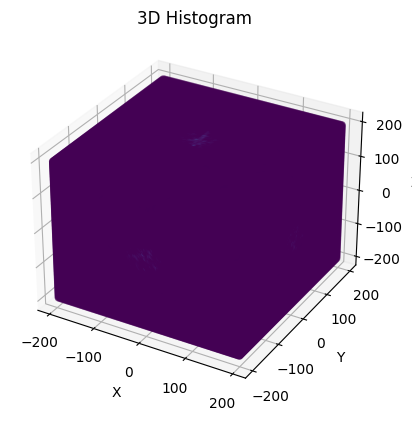

In [19]:
#test2
#np.random.seed(0)
#x = np.random.randn(1000)
#y = np.random.randn(1000)
#z = np.random.randn(1000)
M=100
# Define the bin sizes
bin_size = [M, M, M]

# Histogram the coordinate points
hist, edges = np.histogramdd((x, y, z), bins=bin_size)

# Get the bin centers
x_centers = (edges[0][1:] + edges[0][:-1]) / 2
y_centers = (edges[1][1:] + edges[1][:-1]) / 2
z_centers = (edges[2][1:] + edges[2][:-1]) / 2

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D histogram
xpos, ypos, zpos = np.meshgrid(x_centers, y_centers, z_centers, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = zpos.ravel()
#dx = dy = dz = 0.01 * np.ones_like(xpos)
colors = hist.ravel()

# Plot the 3D histogram using scatter
ax.scatter(xpos, ypos, zpos, c=colors, cmap='viridis', marker='o')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Histogram')

# Show the plot
#plt.show()

In [42]:
#print(edges[1][100])

In [43]:
#print(edges[1])

In [31]:
# This is the function of finding cell indices of the given point with x, y, z 
M=100
def indexfinder(edges, x, y, z, M):
    s=0
    p=0
    q=0
    for i in range(M):
        if x<0:
            if x>=edges[0][i] and x<edges[0][i+1]:
                s=i
        elif x<edges[0][i+1] and x>=edges[0][i]:
            s=i
        if i==M-1:
            if x<=edges[0][i+1] and x>=edges[0][i]:
                s=i
    for i in range(M):
        if y<0:
            if y>=edges[1][i] and y<edges[1][i+1]:
                p=i
        elif y<edges[1][i+1] and y>=edges[1][i]:
            p=i
    for i in range(M):
        if z<0:
            if z>=edges[2][i] and z<edges[2][i+1]:
                q=i
        elif z<edges[2][i+1] and z>=edges[2][i]:
            q=i
        if i==M-1:
            if z<=edges[2][i+1] and z>=edges[2][i]:
                q=i
    return s, p, q

In [37]:
#a=indexfinder(edges, 3, 7, 9 )
#print(a)

In [38]:
# Now let us find histogram cell indices for each galaxy

In [39]:
b=np.zeros(s3)
s=0
for i in range(s3):
    a=indexfinder(edges, dist[i][0], dist[i][1], dist[i][2], M)
    #if a[0]>=M or a[1]>=M or a[2]>=M:
    #   print(a)
    b[i]=hist[a[0], a[1], a[2]]
    if hist[a[0], a[1], a[2]]==0:
        s+=1
print(s)
#print(b)

0


In [40]:
print(s3)

2201925


In [44]:
print(max(b))

201.0


In [107]:
# ch
Sc=0
for i in range(len(b)):
    if b[i]>10:
        Sc+=1
        #print(count(b[i]<2))
print(Sc)

1197750


In [ ]:
#Let us draw acceleration map for all galaxies first. cumulative plot

In [183]:
N=len(xyzm3)
dist=np.zeros(N)
dist_vec=np.zeros((s3,3))
m_halo=np.zeros(s3)
for i in range(N):
    dist[i]=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec[i]=np.array([xyzm3[i][0], xyzm3[i][1], xyzm3[i][2]])
    m_halo[i]=xyzm3[i][3]

In [190]:
m=16
j=np.zeros(m, dtype=int)
steps=[1, 10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
steps1=[10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
for i in range(s3):
    if dist[i]>=steps[0]:
        start=i
        break
print(dist[i])
for k in range(1,m+1):
    while dist[i]  < steps[k]:
        j[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s3-1:
            break

1.020220803781713


In [191]:
G=6.67*10**(-11)

In [197]:
ac_vec2=[[]]*m
ac_scal2=[[]]*m
s=0
for i in range(m):
    s+=j[i]
    ac_vec2[i]=np.zeros((s,3))
    ac_scal2[i]=np.zeros(s)

In [193]:
scale=1.99*10**30/(3.08*10**22)**2

In [198]:
i=start
for k in range(1,m+1):
    p=0
    i=start
    while dist[i]  < steps[k]:
        ac_vec2[k-1][p]=(G*m_halo[i]*scale/dist[i]**3)*dist_vec[i] #in m/s^2
        i+=1
        p+=1
        ac_scal2[k-1][p-1]=np.linalg.norm(ac_vec2[k-1][p-1])
        if i>s3-1:
            break

In [200]:
mean_val2=np.zeros(m)
st_dev2=np.zeros(m)

In [201]:
mean_val2=np.zeros((m,3))
mean_valnorm2=np.zeros((m,3))
mean_scal2=np.zeros(m)
for i in range(m):
    mean_val2[i]=(sum(ac_vec2[i]))/j[i]

In [202]:
x=np.zeros(m);  ra=np.zeros(m)
y=np.zeros(m);  dec=np.zeros(m)
z=np.zeros(m);  phi=np.zeros(m);  phi_pix=np.zeros(m)
norm=np.zeros(m); theta=np.zeros(m); theta_pix=np.zeros(m)
ipix=np.zeros(m, dtype=int)
lon=np.zeros(m) 
lat=np.zeros(m)

In [203]:
Nside3 = 64
r=0.5
npix3 = hp.nside2npix(Nside3)
bins=hp.nside2npix(Nside3)
pix_indices2=[[]]*m
counts2=[[]]*m
max_idx=np.zeros(m)
for i in range(m):
    pix_indices2[i]=np.zeros(j[i])
    counts2[i]=np.zeros(bins)

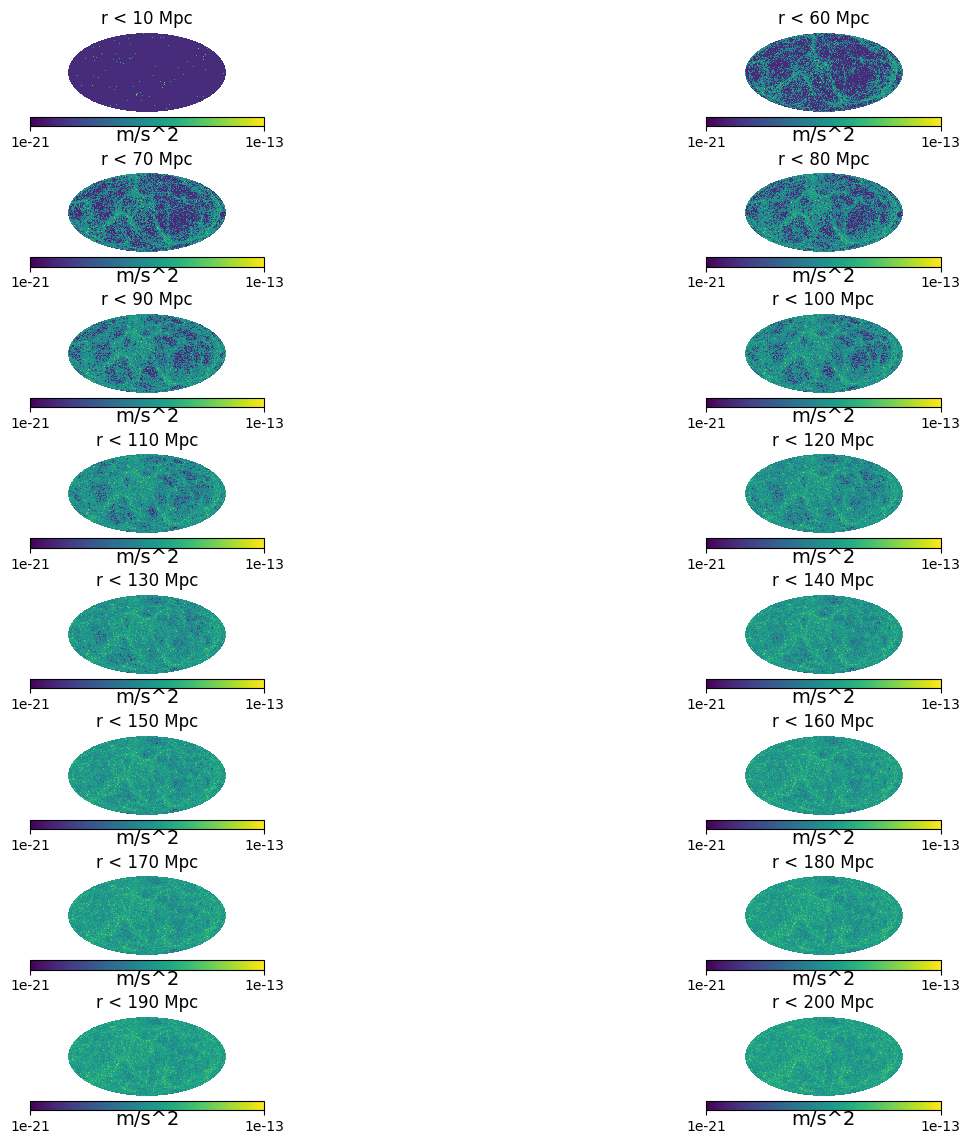

In [204]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices2[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec2[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec2[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec2[k][:,2]*u.dimensionless_unscaled))
    counts2[k],_=np.histogram(pix_indices2[k],bins, weights=ac_scal2[k])
    counts2[k][counts2[k]<=1e-20]=1e-20
    lon[k], lat[k]=hp.vec2ang(mean_val2[k], lonlat=True)
    #max_idx[k]=argmax(counts[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
    dec[k] = np.arctan(mean_val2[k][2]/(np.sqrt(mean_val2[k][0]**2+mean_val2[k][1]**2)))
    ra[k]=np.arctan(mean_val2[k][1]/mean_val2[k][0])
    theta[k] = np.pi/2.0 - dec[k]
    phi[k] = ra[k]
    #ipix[k] = hp.ang2pix(Nside3, theta[k], phi[k])

# Convert ipix to (theta, phi) coordinates
    #theta_pix[k], phi_pix[k] = hp.pix2ang(Nside3, ipix[k], nest=False)

    #hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13 ,unit='m/s^2', badcolor="white",hold=True)
    #hp.visufunc.projscatter(phi[k], theta[k], color='red', s=10)
    #print(k)
    
    #hp.projscatter(ipix[k], lonra=ra[k]*180.0/np.pi, latdec=dec[k]*180/np.pi, c='o', color='red', s=10)
plt.show()

# C - array of clusters, F - array of filaments, V - array of voids.

In [219]:
C=np.array([],[])  
F=np.array([])
V=np.array([])
C_d=np.array([])
F_d=np.array([])
V_d=np.array([])
t1=10
t2=1

In [185]:
s_c=0
s_f=0
s_v=0
for i in range(s3):
    if b[i]>=t1:
        s_c+=1
    elif b[i]<t1 and b[i]>t2:
        s_f+=1
    elif b[i]==t2:
        s_v+=1

In [188]:
print(s_c)
print(s_v)

1277980
79812


In [189]:
print(s_f)

844133


In [220]:
C=np.zeros((s_c, 4))
F=np.zeros((s_f, 4))
V=np.zeros((s_v, 4))
C_d=np.zeros((s_c, 4))
F_d=np.zeros((s_f, 4))
V_d=np.zeros((s_v, 4))

In [116]:
#ch
print(M_halo)

[6.03907453e+09 5.72389236e+10 1.25842810e+10 ... 2.27184232e+10
 1.59201508e+10 7.65179501e+10]


In [118]:
print(len(dist))
print(s3)
l1=0
l2=0
l3=0
for i in range(s3):
    if b[i]>=t1:
        C[l1][0]=dist[i][0]
        C[l1][1]=dist[i][1]
        C[l1][2]=dist[i][2]
        C[l1][3]=M_halo[i]
        l1+=1
    elif b[i]<t1 and b[i]>t2:
        F[l2][0]=dist[i][0]
        F[l2][1]=dist[i][1]
        F[l2][2]=dist[i][2]
        F[l2][3]=M_halo[i]
        l2+=1
    elif b[i]==t2:
     #   if l3> s_v+1:
      #      print(l3)
        V[l3][0]=dist[i][0]
        V[l3][1]=dist[i][1]
        V[l3][2]=dist[i][2]
        V[l3][3]=M_halo[i]
        l3+=1

2201925
2201925


In [ ]:
print(F)

In [43]:
#For clusters, filaments voids

In [119]:
N_c=s_c
dist_c=np.zeros(N_c)
dist_vec_c=np.zeros((s_c,3))
m_halo_c=np.zeros(s_c)
for i in range(N_c):
    dist_c[i]=np.sqrt(C[i][0]**2+C[i][1]**2+C[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec_c[i]=np.array([C[i][0], C[i][1], C[i][2]])
    m_halo_c[i]=C[i][3]

In [120]:
N_f=s_f
dist_f=np.zeros(N_f)
dist_vec_f=np.zeros((s_f,3))
m_halo_f=np.zeros(s_f)
for i in range(N_f):
    dist_f[i]=np.sqrt(F[i][0]**2+F[i][1]**2+F[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec_f[i]=np.array([F[i][0], F[i][1], F[i][2]])
    m_halo_f[i]=F[i][3]

In [121]:
N_v=s_v
dist_v=np.zeros(N_v)
dist_vec_v=np.zeros((s_v,3))
m_halo_v=np.zeros(s_v)
for i in range(N_v):
    dist_v[i]=np.sqrt(V[i][0]**2+V[i][1]**2+V[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec_v[i]=np.array([V[i][0], V[i][1], V[i][2]])
    m_halo_v[i]=V[i][3]

In [122]:
m=16
j_c=np.zeros(m, dtype=int)
steps=[1, 10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
steps1=[10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
print(len(steps))
for i in range(s_c):
    if dist_c[i]>=steps[0]:
        start_c=i
        break
print(dist_c[i])
print(i)
for k in range(1,m+1):
    while dist_c[i]  < steps[k]:
        j_c[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s_c-1:
            break
            #if k==9:
               #print(9)

17
1.020220803781713
2


In [123]:
m=16
j_f=np.zeros(m, dtype=int)
steps=[1, 10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
steps1=[10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
print(len(steps))
for i in range(s_f):
    if dist_f[i]>=steps[0]:
        start_f=i
        break
print(dist_f[i])
for k in range(1,m+1):
    while dist_f[i]  < steps[k]:
        j_f[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s_f-1:
            break
            #if k==9:
               #print(9)

17
1.211628788087097


In [124]:
m=16
j_v=np.zeros(m, dtype=int)
steps=[1, 10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
steps1=[10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
print(len(steps))
for i in range(s_v):
    if dist_v[i]>=steps[0]:
        start_v=i
        break
print(dist_v[i])
for k in range(1,m+1):
    while dist_v[i]  < steps[k]:
        j_v[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s_v-1:
            break
            #if k==9:
               #print(9)

17
3.820560598410975


In [50]:
#ch
print(len(dist_c))

352228


In [125]:
G=6.67*10**(-11)

In [126]:
ac_vec_c=[[]]*m
ac_scal_c=[[]]*m
for i in range(m):
    ac_vec_c[i]=np.zeros((j_c[i],3))
    ac_scal_c[i]=np.zeros(j_c[i])

In [127]:
coor_vec_c=[[]]*m
coor_scal_c=[[]]*m
for i in range(m):
    coor_vec_c[i]=np.zeros((j_c[i],3))
    coor_scal_c[i]=np.zeros(j_c[i])

In [128]:
ac_vec_f=[[]]*m
ac_scal_f=[[]]*m
for i in range(m):
    ac_vec_f[i]=np.zeros((j_f[i],3))
    ac_scal_f[i]=np.zeros(j_f[i])

In [129]:
coor_vec_f=[[]]*m
coor_scal_f=[[]]*m
for i in range(m):
    coor_vec_f[i]=np.zeros((j_f[i],3))
    coor_scal_f[i]=np.zeros(j_f[i])

In [130]:
ac_vec_v=[[]]*m
ac_scal_v=[[]]*m
for i in range(m):
    ac_vec_v[i]=np.zeros((j_v[i],3))
    ac_scal_v[i]=np.zeros(j_v[i])

In [131]:
coor_vec_v=[[]]*m
coor_scal_v=[[]]*m
for i in range(m):
    coor_vec_v[i]=np.zeros((j_v[i],3))
    coor_scal_v[i]=np.zeros(j_v[i])

In [132]:
print(len(ac_vec_c[1]))

29952


In [133]:
scale=1.99*10**30/(3.08*10**22)**2

In [134]:
i=start_c
for k in range(1,m+1):
    p=0
    while dist_c[i]  <= steps[k]:
        ac_vec_c[k-1][p]=(G*m_halo_c[i]*scale/dist_c[i]**3)*dist_vec_c[i] #in m/s^2
        coor_vec_c[k-1][p]=dist_vec_c[i]
        i+=1
        p+=1
        ac_scal_c[k-1][p-1]=np.linalg.norm(ac_vec_c[k-1][p-1])
        coor_scal_c[k-1][p-1]=np.linalg.norm(coor_vec_c[k-1][p-1])
        if i>s_c-1:
            break
    #print(ac_scal[k-1][p-1])

In [135]:
i=start_f
for k in range(1,m+1):
    p=0
    while dist_f[i]  <= steps[k]:
        ac_vec_f[k-1][p]=(G*m_halo_f[i]*scale/dist_f[i]**3)*dist_vec_f[i] #in m/s^2
        coor_vec_f[k-1][p]=dist_vec_f[i]
        i+=1
        p+=1
        ac_scal_f[k-1][p-1]=np.linalg.norm(ac_vec_f[k-1][p-1])
        coor_scal_f[k-1][p-1]=np.linalg.norm(coor_vec_f[k-1][p-1])
        if i>s_f-1:
            break
    #print(ac_scal[k-1][p-1])

In [136]:
i=start_v
for k in range(1,m+1):
    p=0
    while dist_v[i]  <= steps[k]:
        ac_vec_v[k-1][p]=(G*m_halo_v[i]*scale/dist_v[i]**3)*dist_vec_v[i] #in m/s^2
        coor_vec_v[k-1][p]=dist_vec_v[i]
        i+=1
        p+=1
        ac_scal_v[k-1][p-1]=np.linalg.norm(ac_vec_v[k-1][p-1])
        coor_scal_v[k-1][p-1]=np.linalg.norm(coor_vec_v[k-1][p-1])
        if i>s_v-1:
            break
    #print(ac_scal[k-1][p-1])

In [63]:
print(ac_vec[1])

NameError: name 'ac_vec' is not defined

In [137]:
mean_val_c=np.zeros(m)
st_dev_c=np.zeros(m)

In [138]:
mean_val_f=np.zeros(m)
st_dev_f=np.zeros(m)

In [139]:
mean_val_v=np.zeros(m)
st_dev_v=np.zeros(m)

In [140]:
#print(mean_val[i])
#print(mean_valnorm)

In [141]:
#print(max(ac_vec_c[0][1]))

In [142]:
Nside3 = 64
r=0.5
npix3 = hp.nside2npix(Nside3)
bins=hp.nside2npix(Nside3)
pix_indices_c=[[]]*m
counts_c=[[]]*m
max_idx_c=np.zeros(m)
for i in range(m):
    pix_indices_c[i]=np.zeros(j_c[i])
    counts_c[i]=np.zeros(bins)

In [143]:
Nside3 = 64
r=0.5
npix3 = hp.nside2npix(Nside3)
bins=hp.nside2npix(Nside3)
pix_indices_f=[[]]*m
counts_f=[[]]*m
max_idx_f=np.zeros(m)
for i in range(m):
    pix_indices_f[i]=np.zeros(j_f[i])
    counts_f[i]=np.zeros(bins)

In [144]:
Nside3 = 64
r=0.5
npix3 = hp.nside2npix(Nside3)
bins=hp.nside2npix(Nside3)
pix_indices_v=[[]]*m
counts_v=[[]]*m
max_idx_v=np.zeros(m)
for i in range(m):
    pix_indices_v[i]=np.zeros(j_v[i])
    counts_v[i]=np.zeros(bins)

In [222]:
print(dist_vec_c)

[[ 3.62640381e-01  3.45764160e-02  2.99041748e-01]
 [ 3.64257812e-01  1.75994873e-01  6.35131836e-01]
 [ 2.61840820e-02  2.79846191e-02 -1.01950073e+00]
 ...
 [ 7.80008850e+01 -1.72350372e+02 -6.48934021e+01]
 [-9.91176147e+01  2.86057434e+01 -1.71339935e+02]
 [-7.55142212e+01 -1.10041718e+02 -1.48957733e+02]]


In [224]:
print(ac_vec_c[1])

[[-4.38307045e-17 -3.73068405e-17  2.30991965e-17]
 [ 1.09658513e-17 -5.83411186e-19  1.24699077e-17]
 [-4.77052637e-17 -2.87176780e-17  2.05328144e-17]
 ...
 [ 4.33283691e-18  9.72335796e-18 -3.47299351e-19]
 [ 2.79708476e-19  5.56654905e-19 -1.82647571e-20]
 [ 2.58814840e-19  5.77305850e-19 -2.28771477e-20]]


In [ ]:
#plotting galaxies from clusters, filaments, voids

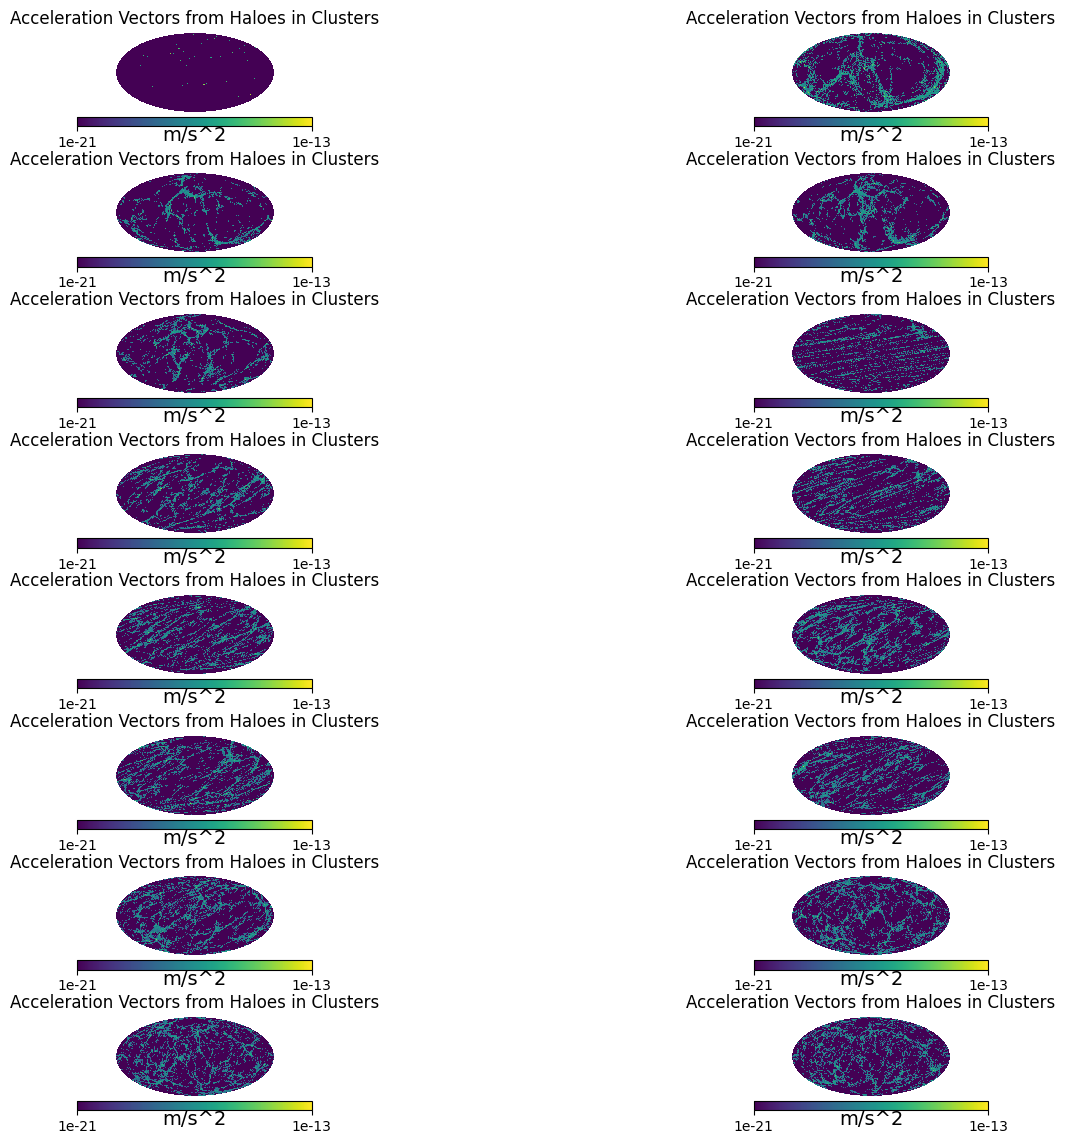

In [226]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices_c[k]=hp.pixelfunc.vec2pix(Nside3, list(coor_vec_c[k][:,0]*u.dimensionless_unscaled),
        list(coor_vec_c[k][:,1]*u.dimensionless_unscaled),
        list(coor_vec_c[k][:,2]*u.dimensionless_unscaled))
    counts_c[k],_=np.histogram(pix_indices_c[k],bins, weights=ac_scal_c[k])
    counts_c[k][counts_c[k]<=1e-21]=1e-21
    #max_idx[k]=argmax(counts[k])
    mean_val_c[k]=np.sum(counts_c[k])/bins
    st_dev_c[k]=np.sqrt(np.sum((counts_c[k]-mean_val_c[k])**2)/bins)
    plt.axes(axs[k])
    hp.mollview(counts_c[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title='Acceleration Vectors from Haloes in Clusters', unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
plt.show()

    #print(counts[k])
    #print(pix_indices[k])

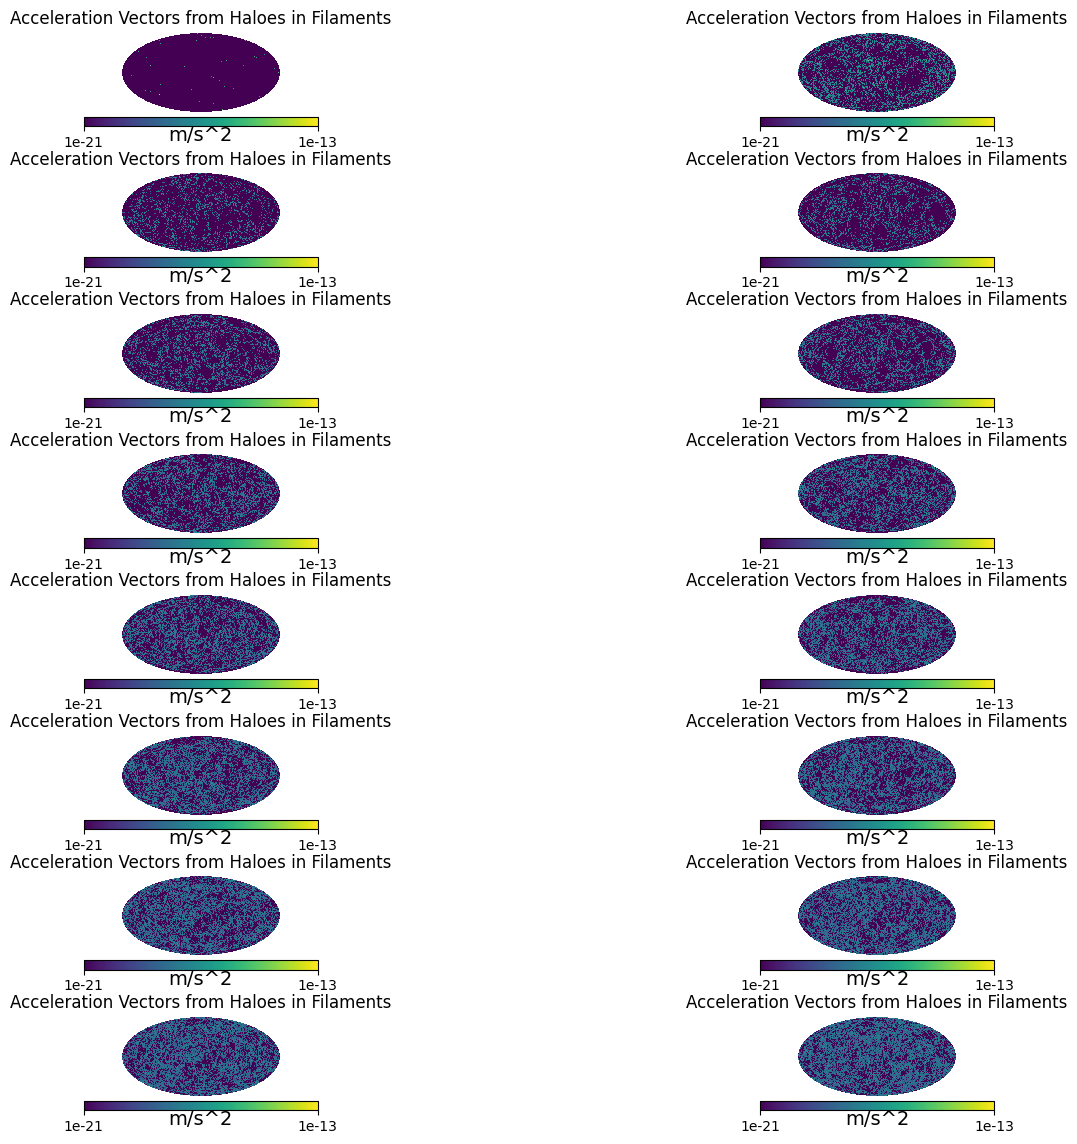

In [227]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices_f[k]=hp.pixelfunc.vec2pix(Nside3, list(coor_vec_f[k][:,0]*u.dimensionless_unscaled),
        list(coor_vec_f[k][:,1]*u.dimensionless_unscaled),
        list(coor_vec_f[k][:,2]*u.dimensionless_unscaled))
    counts_f[k],_=np.histogram(pix_indices_f[k],bins, weights=ac_scal_f[k])
    counts_f[k][counts_f[k]<=1e-21]=1e-21
    #max_idx[k]=argmax(counts[k])
    mean_val_f[k]=np.sum(counts_f[k])/bins
    st_dev_f[k]=np.sqrt(np.sum((counts_f[k]-mean_val_f[k])**2)/bins)
    plt.axes(axs[k])
    hp.mollview(counts_f[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title='Acceleration Vectors from Haloes in Filaments', unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
plt.show()

    #print(counts[k])
    #print(pix_indices[k])

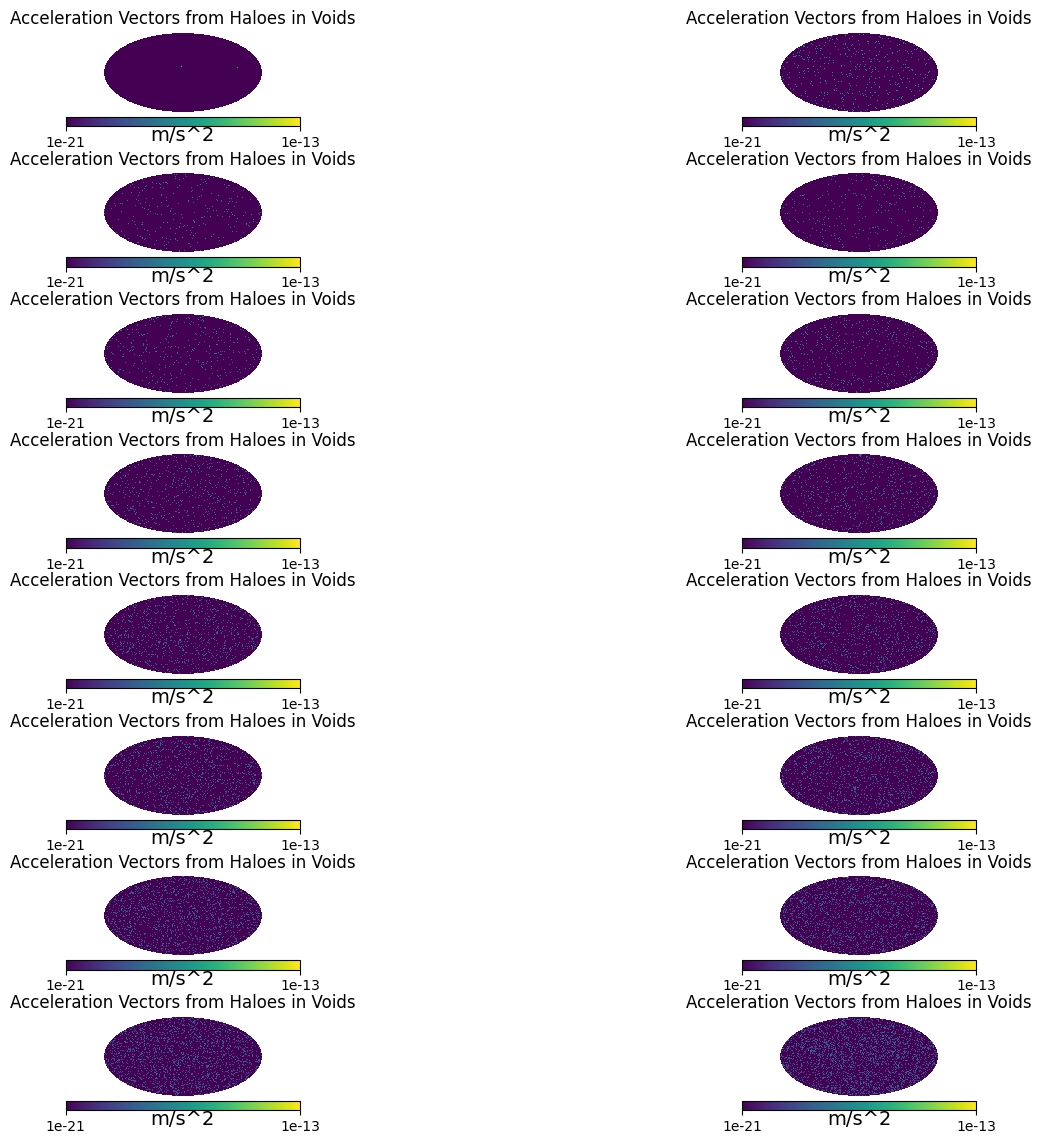

In [228]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices_v[k]=hp.pixelfunc.vec2pix(Nside3, list(coor_vec_v[k][:,0]*u.dimensionless_unscaled),
        list(coor_vec_v[k][:,1]*u.dimensionless_unscaled),
        list(coor_vec_v[k][:,2]*u.dimensionless_unscaled))
    counts_v[k],_=np.histogram(pix_indices_v[k],bins, weights=ac_scal_v[k])
    counts_v[k][counts_v[k]<=1e-21]=1e-21
    #max_idx[k]=argmax(counts[k])
    mean_val_v[k]=np.sum(counts_v[k])/bins
    st_dev_v[k]=np.sqrt(np.sum((counts_v[k]-mean_val_v[k])**2)/bins)
    plt.axes(axs[k])
    hp.mollview(counts_v[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title='Acceleration Vectors from Haloes in Voids', unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
plt.show()

    #print(counts[k])
    #print(pix_indices[k])

In [80]:
#print(max(coor_scal[1]))

In [81]:
# cumulative

In [148]:
pix_indices2_c=[[]]*m
counts2_c=[[]]*m
max_idx2_c=np.zeros(m)
for i in range(m):
    pix_indices2_c[i]=np.zeros(j_c[i])
    counts2_c[i]=np.zeros(bins)

In [149]:
pix_indices2_f=[[]]*m
counts2_f=[[]]*m
max_idx2_f=np.zeros(m)
for i in range(m):
    pix_indices2_f[i]=np.zeros(j_f[i])
    counts2_f[i]=np.zeros(bins)

In [150]:
pix_indices2_v=[[]]*m
counts2_v=[[]]*m
max_idx2_v=np.zeros(m)
for i in range(m):
    pix_indices2_v[i]=np.zeros(j_v[i])
    counts2_v[i]=np.zeros(bins)

In [151]:
ac_vec2_c=[[]]*m
ac_scal2_c=[[]]*m
s=0
for i in range(m):
    s+=j_c[i]
    ac_vec2_c[i]=np.zeros((s,3))
    ac_scal2_c[i]=np.zeros(s)

In [152]:
ac_vec2_f=[[]]*m
ac_scal2_f=[[]]*m
s=0
for i in range(m):
    s+=j_f[i]
    ac_vec2_f[i]=np.zeros((s,3))
    ac_scal2_f[i]=np.zeros(s)

In [153]:
ac_vec2_v=[[]]*m
ac_scal2_v=[[]]*m
s=0
for i in range(m):
    s+=j_v[i]
    ac_vec2_v[i]=np.zeros((s,3))
    ac_scal2_v[i]=np.zeros(s)

In [154]:
i=start_c
for k in range(1,m+1):
    p=0
    i=start_c
    while dist_c[i]  < steps[k]:
        ac_vec2_c[k-1][p]=(G*m_halo_c[i]*scale/dist_c[i]**3)*dist_vec_c[i] #in m/s^2
        i+=1
        p+=1
        ac_scal2_c[k-1][p-1]=np.linalg.norm(ac_vec2_c[k-1][p-1])
        if i>s_c-1:
            break

In [155]:
i=start_f
for k in range(1,m+1):
    p=0
    i=start_f
    while dist_f[i]  < steps[k]:
        ac_vec2_f[k-1][p]=(G*m_halo_f[i]*scale/dist_f[i]**3)*dist_vec_f[i] #in m/s^2
        i+=1
        p+=1
        ac_scal2_f[k-1][p-1]=np.linalg.norm(ac_vec2_f[k-1][p-1])
        if i>s_f-1:
            break

In [156]:
i=start_v
for k in range(1,m+1):
    p=0
    i=start_v
    while dist_v[i]  < steps[k]:
        ac_vec2_v[k-1][p]=(G*m_halo_v[i]*scale/dist_v[i]**3)*dist_vec_v[i] #in m/s^2
        i+=1
        p+=1
        ac_scal2_v[k-1][p-1]=np.linalg.norm(ac_vec2_v[k-1][p-1])
        if i>s_v-1:
            break

In [157]:
mean_val2_c=np.zeros(m)
st_dev2_c=np.zeros(m)

In [158]:
mean_val2_f=np.zeros(m)
st_dev2_f=np.zeros(m)

In [159]:
mean_val2_v=np.zeros(m)
st_dev2_v=np.zeros(m)

In [160]:
mean_val2_c=np.zeros((m,3))
mean_valnorm2_c=np.zeros((m,3))
mean_scal2_c=np.zeros(m)
for i in range(m):
    mean_val2_c[i]=(sum(ac_vec2_c[i]))/j_c[i]
    #print(mean_valnorm[i])

In [161]:
mean_val2_f=np.zeros((m,3))
mean_valnorm2_f=np.zeros((m,3))
mean_scal2_f=np.zeros(m)
for i in range(m):
    mean_val2_f[i]=(sum(ac_vec2_f[i]))/j_f[i]
    #print(mean_valnorm[i])

In [162]:
mean_val2_v=np.zeros((m,3))
mean_valnorm2_v=np.zeros((m,3))
mean_scal2_v=np.zeros(m)
for i in range(m):
    mean_val2_v[i]=(sum(ac_vec2_v[i]))/j_v[i]
    #print(mean_valnorm[i])

In [173]:
x_c=np.zeros(m);  ra_c=np.zeros(m)
y_c=np.zeros(m);  dec_c=np.zeros(m)
z_c=np.zeros(m);  phi_c=np.zeros(m);  phi_pix_c=np.zeros(m)
norm_c=np.zeros(m); theta_c=np.zeros(m); theta_pix_c=np.zeros(m)
ipix_c=np.zeros(m, dtype=int)
lon_c=np.zeros(m)
lat_c=np.zeros(m)

In [174]:
x_f=np.zeros(m);  ra_f=np.zeros(m)
y_f=np.zeros(m);  dec_f=np.zeros(m)
z_f=np.zeros(m);  phi_f=np.zeros(m);  phi_pix_f=np.zeros(m)
norm_f=np.zeros(m); theta_f=np.zeros(m); theta_pix_f=np.zeros(m)
ipix_f=np.zeros(m, dtype=int)
lon_f=np.zeros(m)
lat_f=np.zeros(m)

In [175]:
x_v=np.zeros(m);  ra_v=np.zeros(m)
y_v=np.zeros(m);  dec_v=np.zeros(m)
z_v=np.zeros(m);  phi_v=np.zeros(m);  phi_pix_v=np.zeros(m)
norm_v=np.zeros(m); theta_v=np.zeros(m); theta_pix_v=np.zeros(m)
ipix_v=np.zeros(m, dtype=int)
lon_v=np.zeros(m)
lat_v=np.zeros(m)

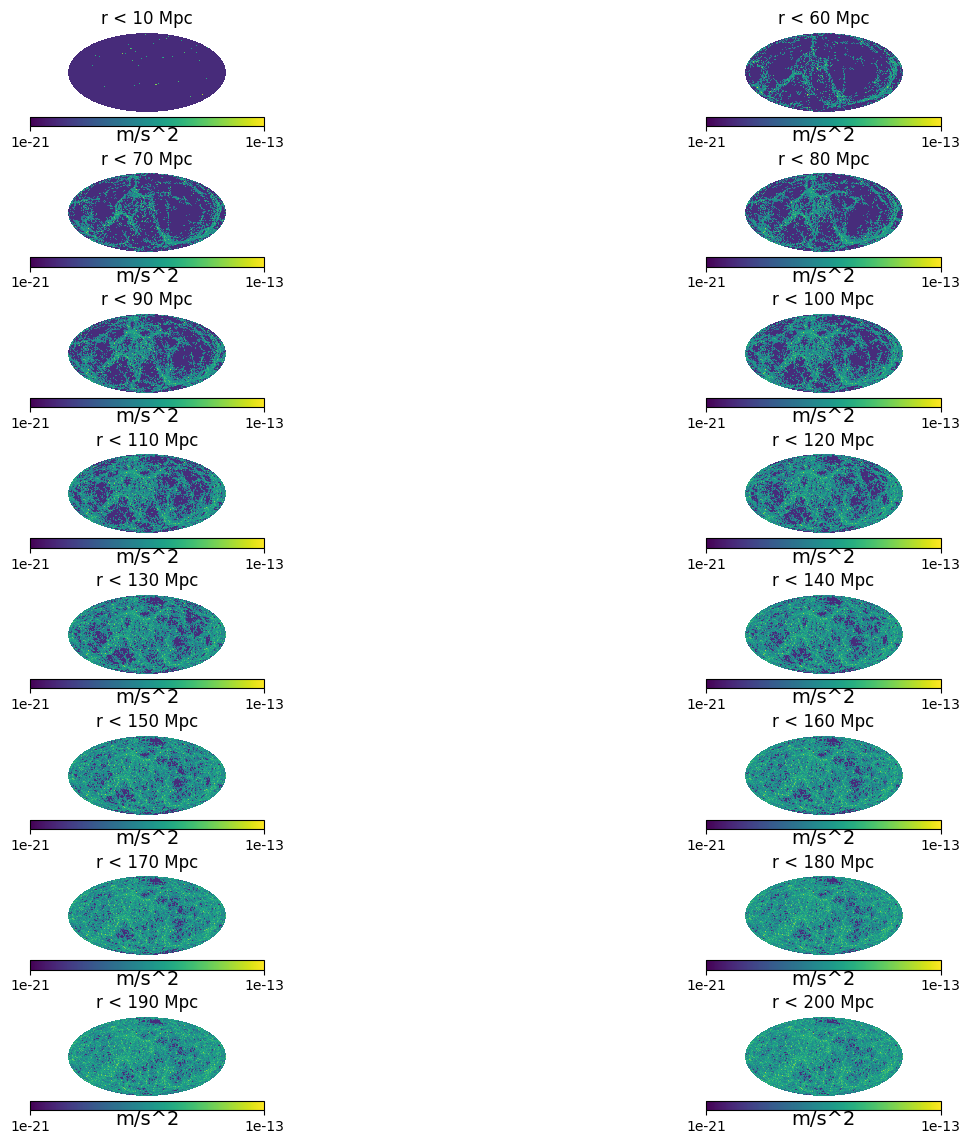

In [176]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices2_c[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec2_c[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec2_c[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec2_c[k][:,2]*u.dimensionless_unscaled))
    #print(pix_indices2_c)
    counts2_c[k],_=np.histogram(pix_indices2_c[k],bins, weights=ac_scal2_c[k])
    counts2_c[k][counts2_c[k]<=1e-20]=1e-20
    lon_c[k], lat_c[k]=hp.vec2ang(mean_val2_c[k], lonlat=True)
    #max_idx[k]=argmax(counts[k])
    #print(counts2_c[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts2_c[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
plt.show()

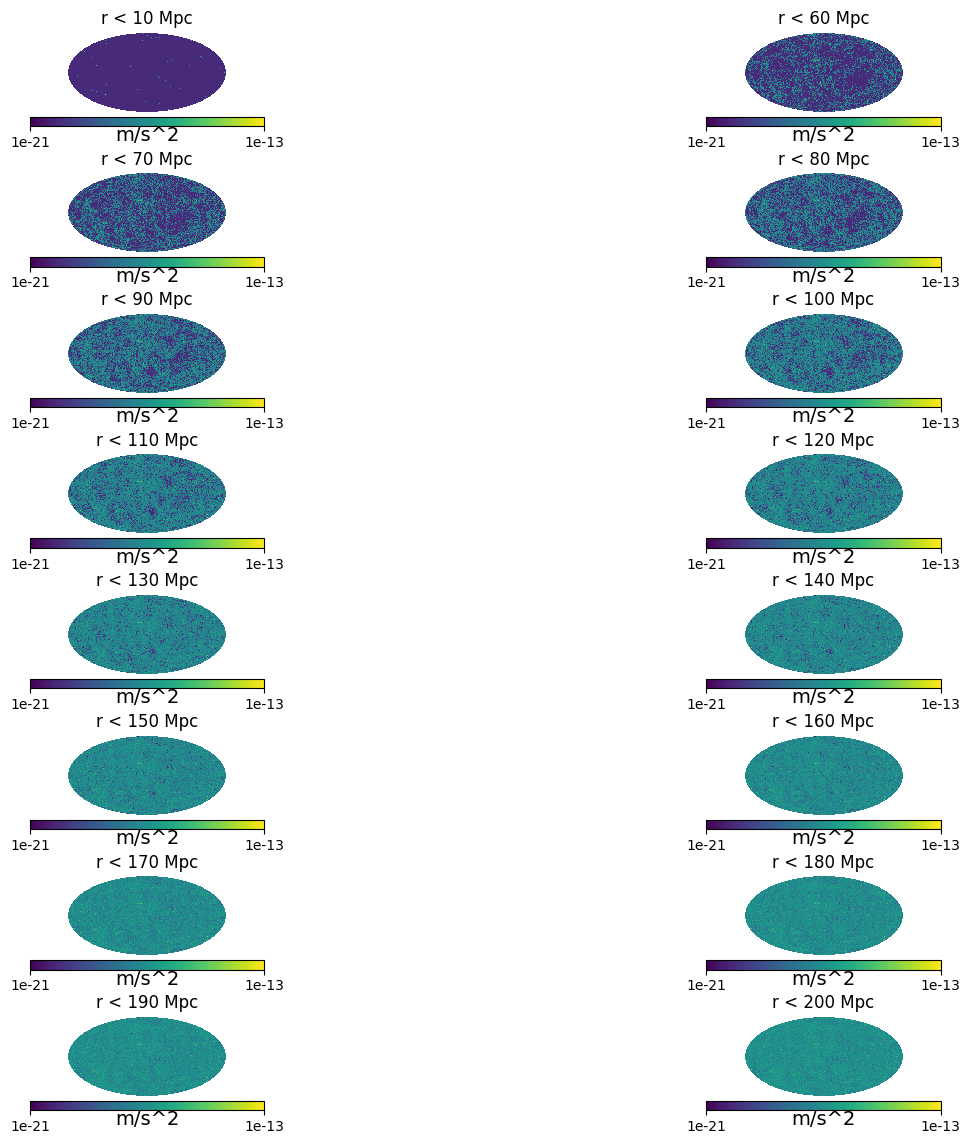

In [177]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices2_f[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec2_f[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec2_f[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec2_f[k][:,2]*u.dimensionless_unscaled))
    #print(pix_indices2_c)
    counts2_f[k],_=np.histogram(pix_indices2_f[k],bins, weights=ac_scal2_f[k])
    counts2_f[k][counts2_f[k]<=1e-20]=1e-20
    lon_f[k], lat_f[k]=hp.vec2ang(mean_val2_f[k], lonlat=True)
    #max_idx[k]=argmax(counts[k])
    #print(counts2_c[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts2_f[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
    
    #hp.projscatter(ipix[k], lonra=ra[k]*180.0/np.pi, latdec=dec[k]*180/np.pi, c='o', color='red', s=10)
plt.show()

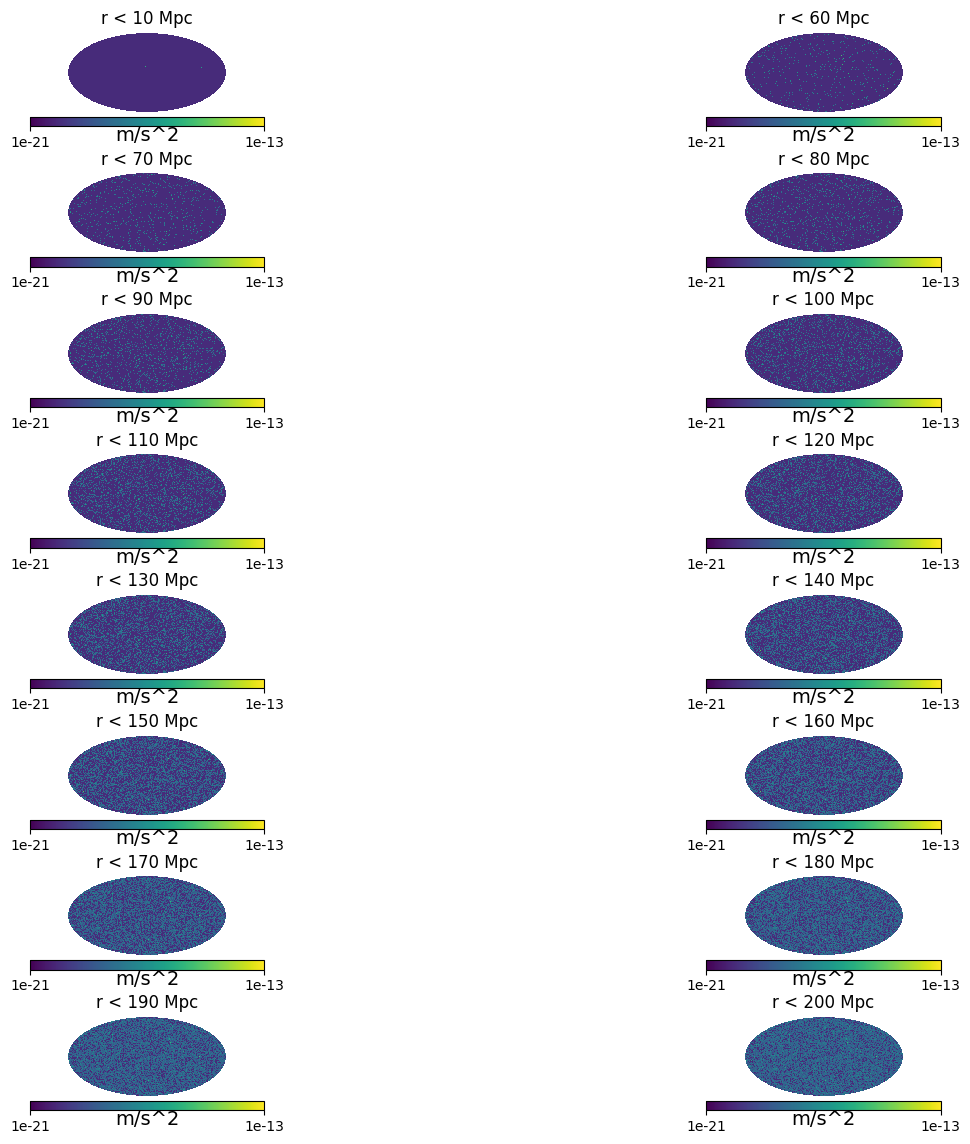

In [178]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices2_v[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec2_v[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec2_v[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec2_v[k][:,2]*u.dimensionless_unscaled))
    #print(pix_indices2_c)
    counts2_v[k],_=np.histogram(pix_indices2_v[k],bins, weights=ac_scal2_v[k])
    counts2_v[k][counts2_v[k]<=1e-20]=1e-20
    lon_v[k], lat_v[k]=hp.vec2ang(mean_val2_v[k], lonlat=True)
    #max_idx[k]=argmax(counts[k])
    #print(counts2_c[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts2_v[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
plt.show()

In [ ]:
#plot acceleration points for clusters, filaments, voids.

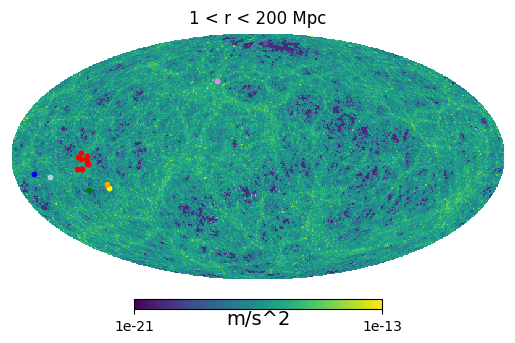

In [179]:
hp.mollview(counts2_c[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{} < r < {} Mpc".format(steps[0],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.projscatter(lon_c[0], lat_c[0], lonlat=True, color='violet', s=10)
hp.projscatter(lon_c[1], lat_c[1], lonlat=True, color='blue', s=10)
hp.projscatter(lon_c[2], lat_c[2], lonlat=True,color='lightblue', s=10)
hp.projscatter(lon_c[3], lat_c[3], lonlat=True, color='green', s=10)
hp.projscatter(lon_c[4], lat_c[4], lonlat=True, color='yellow', s=10)
hp.projscatter(lon_c[5], lat_c[5], lonlat=True, color='orange', s=10)
hp.projscatter(lon_c[6], lat_c[6], lonlat=True, color='red', s=10)
hp.projscatter(lon_c[7], lat_c[7], lonlat=True, color='red', s=10)
hp.projscatter(lon_c[8], lat_c[8], lonlat=True, color='red', s=10)
hp.projscatter(lon_c[9], lat_c[9], lonlat=True, color='red', s=10)
hp.projscatter(lon_c[10], lat_c[10], lonlat=True, color='red', s=10)
hp.projscatter(lon_c[11], lat_c[11], lonlat=True, color='red', s=10)
hp.projscatter(lon_c[12], lat_c[12], lonlat=True, color='red', s=10)
hp.projscatter(lon_c[13], lat_c[13], lonlat=True, color='red', s=10)
hp.projscatter(lon_c[14], lat_c[14], lonlat=True, color='red', s=10)
hp.projscatter(lon_c[15], lat_c[15], lonlat=True, color='red', s=10)

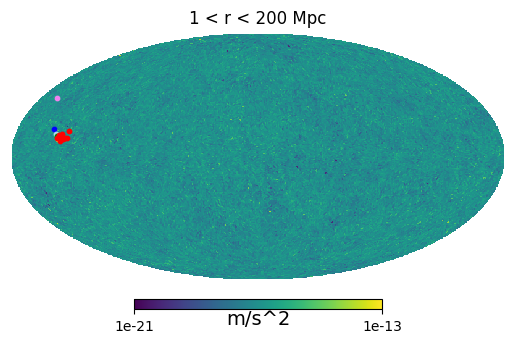

In [180]:
hp.mollview(counts2_f[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{} < r < {} Mpc".format(steps[0],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.projscatter(lon_f[0], lat_f[0], lonlat=True, color='violet', s=10)
hp.projscatter(lon_f[1], lat_f[1], lonlat=True, color='blue', s=10)
hp.projscatter(lon_f[2], lat_f[2], lonlat=True,color='lightblue', s=10)
hp.projscatter(lon_f[3], lat_f[3], lonlat=True, color='green', s=10)
hp.projscatter(lon_f[4], lat_f[4], lonlat=True, color='yellow', s=10)
hp.projscatter(lon_f[5], lat_f[5], lonlat=True, color='orange', s=10)
hp.projscatter(lon_f[6], lat_f[6], lonlat=True, color='red', s=10)
hp.projscatter(lon_f[7], lat_f[7], lonlat=True, color='red', s=10)
hp.projscatter(lon_f[8], lat_f[8], lonlat=True, color='red', s=10)
hp.projscatter(lon_f[9], lat_f[9], lonlat=True, color='red', s=10)
hp.projscatter(lon_f[10], lat_f[10], lonlat=True, color='red', s=10)
hp.projscatter(lon_f[11], lat_f[11], lonlat=True, color='red', s=10)
hp.projscatter(lon_f[12], lat_f[12], lonlat=True, color='red', s=10)
hp.projscatter(lon_f[13], lat_f[13], lonlat=True, color='red', s=10)
#hp.projscatter(lon[14], lat[14], lonlat=True, color='red', s=10)
hp.projscatter(lon_f[15], lat_f[15], lonlat=True, color='red', s=10)

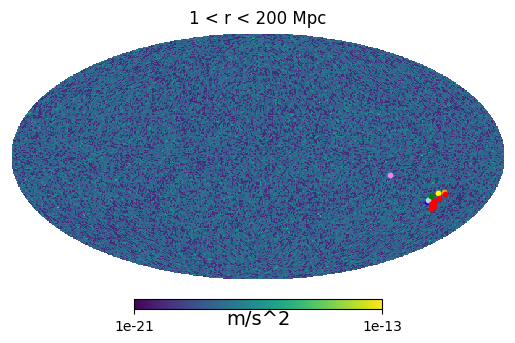

In [181]:
hp.mollview(counts2_v[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{} < r < {} Mpc".format(steps[0],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.projscatter(lon_v[0], lat_v[0], lonlat=True, color='violet', s=10)
hp.projscatter(lon_v[1], lat_v[1], lonlat=True, color='blue', s=10)
hp.projscatter(lon_v[2], lat_v[2], lonlat=True,color='lightblue', s=10)
hp.projscatter(lon_v[3], lat_v[3], lonlat=True, color='green', s=10)
hp.projscatter(lon_v[4], lat_v[4], lonlat=True, color='yellow', s=10)
hp.projscatter(lon_v[5], lat_v[5], lonlat=True, color='orange', s=10)
hp.projscatter(lon_v[6], lat_v[6], lonlat=True, color='red', s=10)
hp.projscatter(lon_v[7], lat_v[7], lonlat=True, color='red', s=10)
hp.projscatter(lon_v[8], lat_v[8], lonlat=True, color='red', s=10)
hp.projscatter(lon_v[9], lat_v[9], lonlat=True, color='red', s=10)
hp.projscatter(lon_v[10], lat_v[10], lonlat=True, color='red', s=10)
hp.projscatter(lon_v[11], lat_v[11], lonlat=True, color='red', s=10)
hp.projscatter(lon_v[12], lat_v[12], lonlat=True, color='red', s=10)
hp.projscatter(lon_v[13], lat_v[13], lonlat=True, color='red', s=10)
hp.projscatter(lon_v[14], lat_v[14], lonlat=True, color='red', s=10)
hp.projscatter(lon_v[15], lat_v[15], lonlat=True, color='red', s=10)

In [207]:
# Now I will plot every galaxy acceleration and different colors mean acceleration from clusters, filaments, voids,
# red - clusters, orange-filaments, yellow- voids, blue - everything

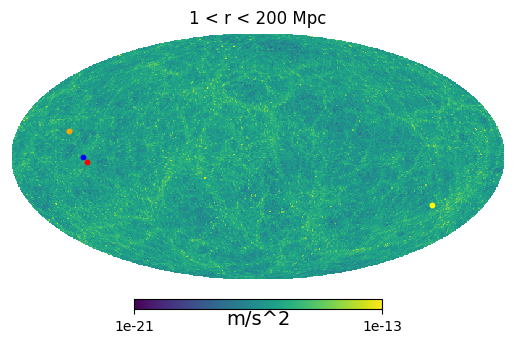

In [206]:
hp.mollview(counts2[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{} < r < {} Mpc".format(steps[0],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.projscatter(lon_c[15], lat_c[15], lonlat=True, color='red', s=10)
hp.projscatter(lon_f[15], lat_f[15], lonlat=True, color='orange', s=10)
hp.projscatter(lon_v[15], lat_v[15], lonlat=True, color='yellow', s=10)
hp.projscatter(lon[15], lat[15], lonlat=True, color='blue', s=10)

In [ ]:
#plot velocity and acceleration from all galaxies

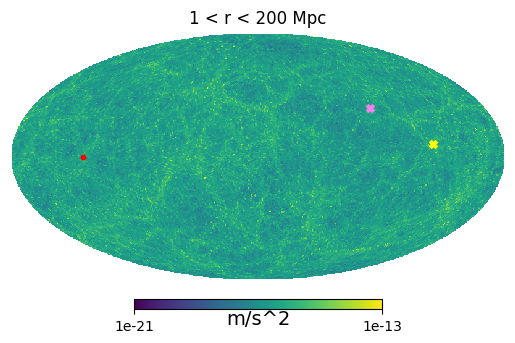

In [218]:
b_vel_obs=29
l_vel_obs=271
b_vel_sim=7
l_vel_sim=232
hp.mollview(counts2[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{} < r < {} Mpc".format(steps[0],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.projscatter(lon[15], lat[15], lonlat=True, color='red', s=10)
hp.projscatter(l_vel_obs, b_vel_obs, lonlat=True, color='violet', s=30, marker='X')
hp.projscatter(l_vel_sim, b_vel_sim, lonlat=True, color='yellow', s=30, marker="X")

In [169]:
#check
nside = 16

In [ ]:
|#Plotting mean acceleration 